In [2]:
!pip3 install langchain openai chromadb faiss-cpu pandas matplotlib seaborn plotly tiktoken pymupdf python-dotenv

In [3]:
# import os
# import sys
# import pandas as pd

# # Add root path to sys.path so utils can be imported
# # project_path = os.path.abspath(".")
# project_path = os.path.abspath("../../..")  # Adjust relative path based on your notebook location
# # sys.path.append(project_root)
# sys.path.append(project_path)

# Add the parent directory to sys.path so it can find 'utils'
# project_path = os.path.abspath("AI-powered-Business-Intelligence-Assistant")
# sys.path.append(project_path)

import os
import sys
import pandas as pd

# Automatically find and add the path to the 'AI-powered-Business-Intelligence-Assistant' project
notebook_path = os.getcwd()
target_dir = "AI-powered-Business-Intelligence-Assistant"

while notebook_path != "/":
    if target_dir in os.listdir(notebook_path):
        project_path = os.path.join(notebook_path, target_dir)
        sys.path.append(project_path)
        print(f"✅ Added to sys.path: {project_path}")
        break
    notebook_path = os.path.dirname(notebook_path)
else:
    print("❌ Could not find the project directory.")





✅ Added to sys.path: /Users/pratikpatel/FineTuneLLM/AI-powered-Business-Intelligence-Assistant


In [4]:
# ✅ Import functions from utils package
from utils.data_utils import load_data, clean_data
from utils.llm_utils import create_vectorstore, build_llm_chain
from utils.visualization_utils import plot_trends
from utils.pdf_utils import process_pdf_folder
from utils.llm_utils import build_llm_chain

In [ ]:
# ✅ Create .env file with your OpenAI API key
with open(".env", "w") as f:
    f.write("OPENAI_API_KEY=")


In [6]:
print("Current working dir:", os.getcwd())
print("Looking for folder:", os.path.exists("AI-powered-Business-Intelligence-Assistant/data/pdf_folder"))


Current working dir: /Users/pratikpatel/FineTuneLLM/AI-powered-Business-Intelligence-Assistant/notebooks
Looking for folder: False


In [7]:
from dotenv import load_dotenv
load_dotenv()

import os
print("API Key loaded:", os.getenv("OPENAI_API_KEY")[:10] + "...")


API Key loaded: sk-proj-p2...


In [8]:
# Load and clean CSV data
df = load_data(os.path.join(project_path, "data/sales_data.csv"))
df = clean_data(df)
df.head()

,Date,Product,Region,Sales,Customer_Age,Customer_Gender,Customer_Satisfaction
0,2022-01-01,Widget C,South,786,26,Male,2.874407
1,2022-01-02,Widget D,East,850,29,Male,3.365205
2,2022-01-03,Widget A,North,871,40,Female,4.547364
3,2022-01-04,Widget C,South,464,31,Male,4.555420
4,2022-01-05,Widget C,South,262,50,Female,3.982935


In [9]:
print(df.columns)

Index(['Date', 'Product', 'Region', 'Sales', 'Customer_Age', 'Customer_Gender',
       'Customer_Satisfaction'],
      dtype='object')


In [10]:
# Create vector store and LLM chain for CSV data
vectordb = create_vectorstore(df)
qa_chain = build_llm_chain(vectordb)

/Users/pratikpatel/FineTuneLLM/AI-powered-Business-Intelligence-Assistant/utils/llm_utils.py:30: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()
/Users/pratikpatel/FineTuneLLM/AI-powered-Business-Intelligence-Assistant/utils/llm_utils.py:32: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectordb.persist()
/Users/pratikpatel/FineTuneLLM/AI-powered-Business-Intelligence-Assistant/utils/llm_utils.py:38: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in t

In [11]:
# # Ask question on CSV data
query = "What are the key trends in product sales over the last year?"
response = qa_chain.invoke(query)
print(response)

{'query': 'What are the key trends in product sales over the last year?', 'result': "I don't have data on product sales trends over the last year, as my training only includes information up to October 2023."}


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


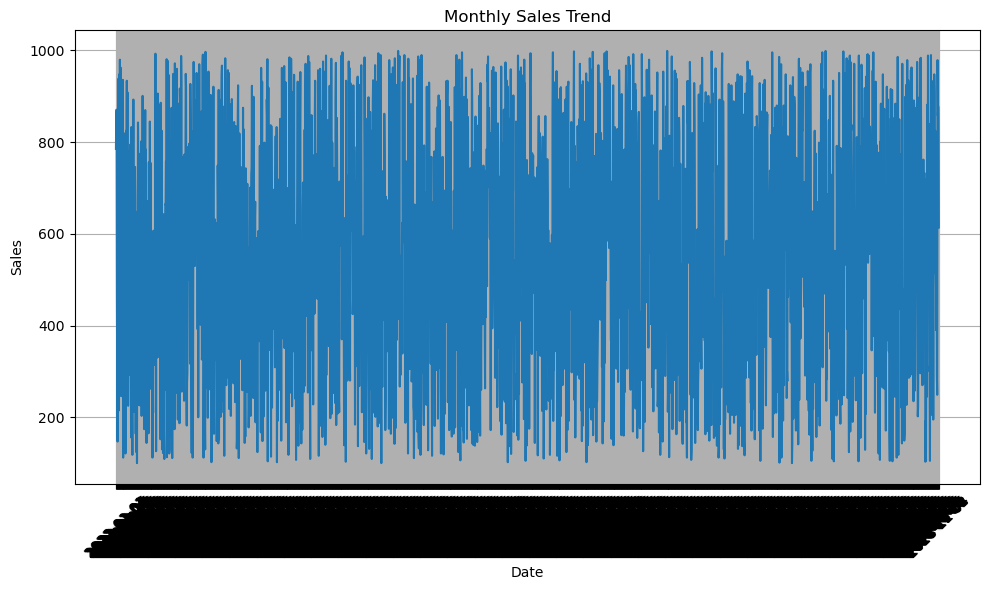

In [12]:
# Optional: Plot trend from CSV
plot_trends(df, column_x="Date", column_y="Sales", title="Monthly Sales Trend")

In [13]:
query = "What is this Data about??"
response = qa_chain.invoke(query)
print(response)

{'query': 'What is this Data about??', 'result': "The data provided is about sales transactions for a product called Widget D. It includes information on the date of sale, the region where the sale occurred (East or North), the number of units sold, the age and gender of the customer, and the customer's satisfaction score."}


{'query': 'Analyze sales patterns from the available product data.', 'result': 'Based on the available product data, we can observe the following sales patterns for Widget A:\n\n1. **Sales by Region and Date:**\n   - On 2025-07-13, Widget A was sold in the North region with sales of 334 units.\n   - On 2025-03-12, Widget A was sold in the East region with sales of 648 units.\n\n2. **Customer Demographics:**\n   - On both dates, the customers were female.\n   - On 2025-07-13, the customer age was 33.\n   - On 2025-03-12, the customer age was 65.\n\n3. **Satisfaction Scores:**\n   - The satisfaction score on 2025-07-13 was 1.369383355781729.\n   - The satisfaction score on 2025-03-12 was 2.976630414207217.\n\nFrom this data, we can infer that sales were higher in the East region on 2025-03-12 compared to the North region on 2025-07-13. Additionally, the satisfaction score was higher for the sales in the East region. However, the data is limited, and further information would be needed fo

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


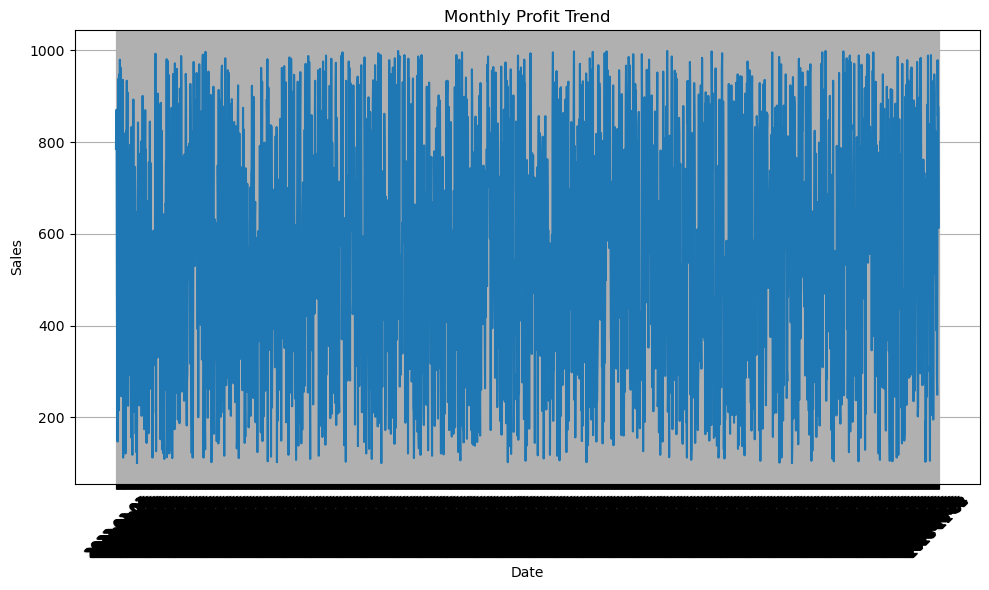

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


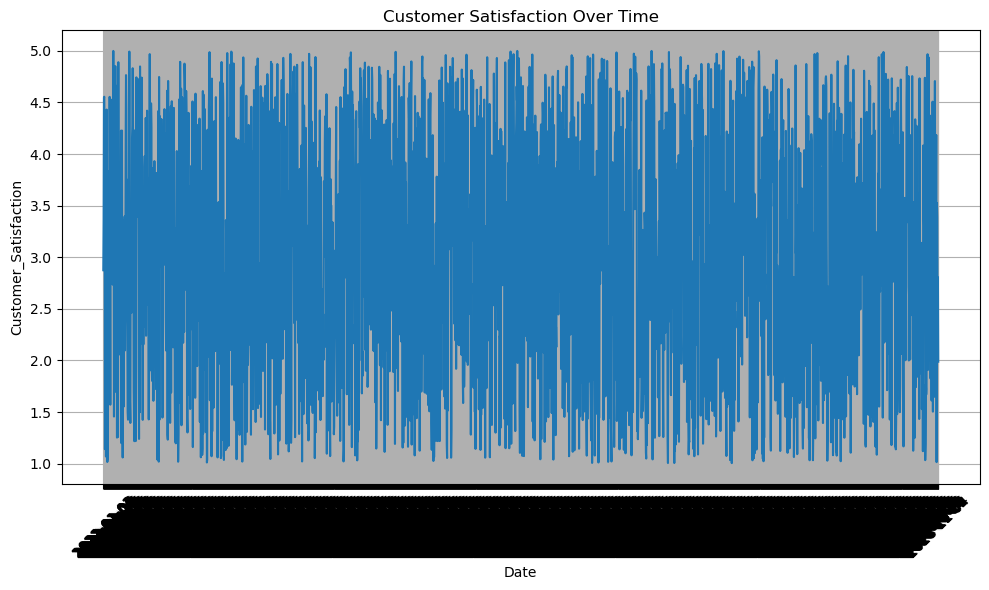

In [14]:
query = "Analyze sales patterns from the available product data."
response = qa_chain.invoke(query)
print(response)

plot_trends(df, column_x="Date", column_y="Sales", title="Monthly Profit Trend")
plot_trends(df, column_x="Date", column_y="Customer_Satisfaction", title="Customer Satisfaction Over Time")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


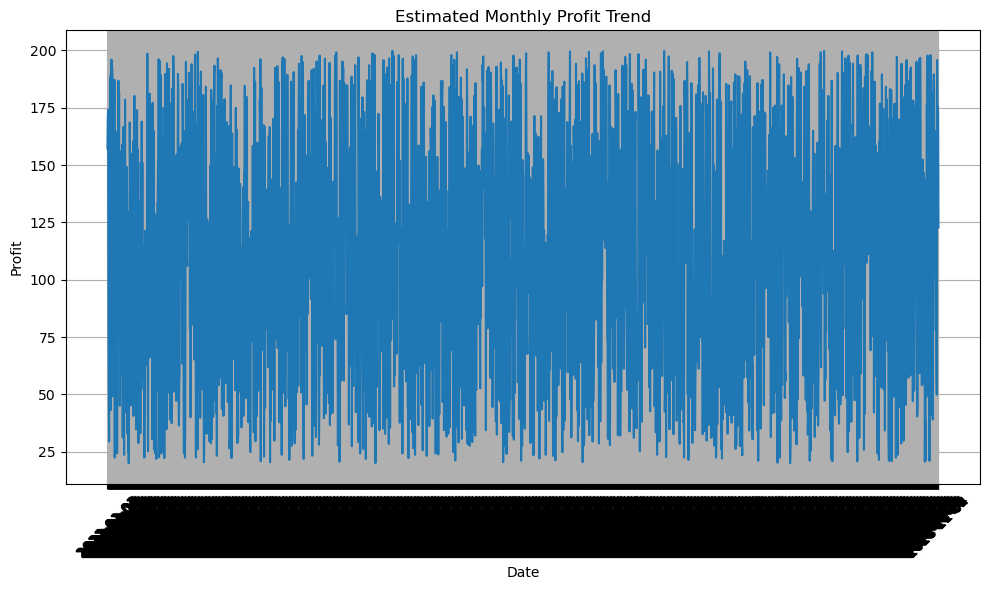

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


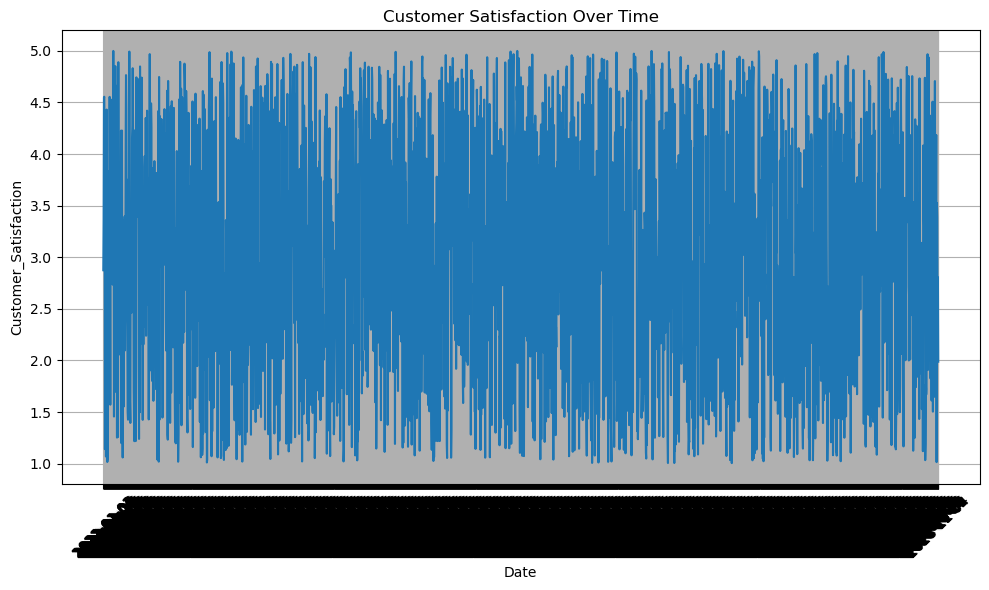

In [15]:
# Optional: Create synthetic profit column
df["Profit"] = df["Sales"] * 0.2

# Plot updated trends
plot_trends(df, column_x="Date", column_y="Profit", title="Estimated Monthly Profit Trend")
plot_trends(df, column_x="Date", column_y="Customer_Satisfaction", title="Customer Satisfaction Over Time")



In [20]:
import os

notebook_path = os.getcwd() 
project_root = os.path.dirname(notebook_path)
# Set path based on notebook location
# project_root = os.path.abspath("AI-powered-Business-Intelligence-Assistant")
pdf_folder_path = os.path.join(project_root, "data", "pdf_folder")

# Optional check
print("✅ Looking for path:", pdf_folder_path)
print("📂 Exists?", os.path.exists(pdf_folder_path))  # Should return True


✅ Looking for path: /Users/pratikpatel/FineTuneLLM/AI-powered-Business-Intelligence-Assistant/data/pdf_folder
📂 Exists? True


In [22]:
# PDF Analysis
from utils.pdf_utils import process_pdf_folder
from utils.llm_utils import build_llm_chain



# Load PDF vector store
# vectordb = process_pdf_folder("AI-powered-Business-Intelligence-Assistant/data/pdf_fold")
# print(vectordb._collection.count())

vectordb = process_pdf_folder(folder_path=pdf_folder_path)

qa_chain = build_llm_chain(vectordb)
print(qa_chain)

# Ask PDF-based question
query = "Compare the different business intelligence approaches across the PDFs."
response = qa_chain.invoke(query)
print(response)

📄 Loading: Time-Series-Data-Prediction-using-IoT-and-Machine-Le_2020_Procedia-Computer-.pdf
📄 Loading: BI approaches.pdf
📄 Loading: Walmarts sales data analysis.pdf
📄 Loading: AI business model innovation.pdf
📚 Total documents loaded: 47

🧩 Sample chunks:

—– Chunk 1 —–
ScienceDirect
Available online at www.sciencedirect.com
Procedia Computer Science 167 (2020) 373–381
1877-0509 © 2020 The Authors. Published by Elsevier B.V.
This is an open access article under the CC BY-NC-ND license (http://creativecommons.org/licenses/by-nc-nd/4.0/)
Peer-review under responsibility of the scientific committee of the International Conference on Computational Intelligence and Data 
Science (ICCIDS 2019).
10.1016/j.procs.2020.03.240
© 2020 The Authors. Published by Elsevier B.V

—– Chunk 2 —–
374	
Raghavendra Kumar  et al. / Procedia Computer Science 167 (2020) 373–381
1. Introduction 
Time series data is a sequential data at regular time interval in a given period. G.E.P. Box et al. (2008), emphasis 


In [24]:
print("Expected input key(s):", qa_chain.input_keys)

try:
    response = qa_chain.invoke({"query": "What are key insights about AI innovation?"})
    print("✅ Result:", response["result"])
except Exception as e:
    import traceback
    traceback.print_exc()


Expected input key(s): ['query']
✅ Result: The key insights about AI innovation, as derived from the provided context, include:

1. **AI as a Disruptive Technology**: AI is considered one of the most disruptive and groundbreaking technologies of the 21st century, with significant potential to transform industries and business models.

2. **AI-Driven Business Model Innovation (BMI)**: AI is driving business model innovation by enabling new ways of creating, delivering, and capturing value. This involves both incremental improvements and radical changes to existing business models.

3. **Roles of AI in Business**: AI can play various roles in business, including as a supporter (enhancing existing processes), enabler (redefining or creating new processes), innovator (creating new value propositions), and disrupter (challenging industry standards).

4. **Management and Organizational Challenges**: Successful AI integration requires new leadership approaches, cultural shifts, and organizati

In [25]:
# Try these in a loop or individually
response = qa_chain.invoke({"query": "What are key insights about AI innovation?"})
print("✅ Result:", response["result"])

response = qa_chain.invoke({"query": "Summarize the Walmart sales analysis findings."})
print("✅ Result:", response["result"])

response = qa_chain.invoke({"query": "What does the time-series prediction paper suggest?"})
print("✅ Result:", response["result"])

response = qa_chain.invoke({"query": "Give a comparison of BI tools or frameworks mentioned."})
print("✅ Result:", response["result"])

✅ Result: The key insights about AI innovation, based on the provided context, include:

1. **AI as a Disruptive Technology**: AI is considered one of the most disruptive and groundbreaking technologies of the 21st century, with significant potential to transform industries and business models.

2. **AI-Driven Business Model Innovation (BMI)**: AI is driving business model innovation by enabling new ways of creating, delivering, and capturing value. This involves both incremental improvements and radical changes to existing business models.

3. **Roles of AI in Business**: AI can play various roles in business, including as a supporter (enhancing existing processes), enabler (redefining or creating new processes), innovator (creating new value propositions), and disrupter (challenging and redefining industry standards).

4. **Management and Organizational Challenges**: Successful AI implementation requires new leadership approaches, cultural shifts, and organizational changes. Many AI 

In [28]:
from pprint import pprint
pprint(response)

{'query': 'Give a comparison of BI tools or frameworks mentioned.',
 'result': 'The context provided does not mention specific BI tools or '
           'frameworks by name. However, it does describe the general '
           'capabilities and purposes of BI systems. BI tools are generally '
           'described as software that analyzes data from different sources, '
           'provides views, patterns, and interfaces, and supports '
           'decision-making processes. They are used for data analysis, '
           'reporting, and providing managers with timely, relevant, and '
           'easy-to-use information. Specific functionalities mentioned '
           'include OLAP tools for multidimensional data analysis, tools for '
           'extracting and transforming data for statistical analysis, and '
           'tools for creating dashboards and scorecards. If you need a '
           'comparison of specific BI tools, such as Tableau, Power BI, or '
           'Qlik, that informat

In [30]:
response = qa_chain.invoke({"query": "What is document about?"})
print("✅ Result:", response["result"])

✅ Result: The document is a review study on Business Intelligence (BI) concepts and approaches. It discusses the importance of accessing useful information and knowledge in today's challenging business environment and how BI tools can support the informational needs of organizations. The study systematically reviews recent research and papers in the field of BI, classifying and prioritizing the concepts and approaches into managerial, technical, and system-enabled categories. It also provides definitions and approaches related to BI, highlighting its role in supporting decision-making and achieving competitive advantage.
